# Traçando gráficos com matplotlib
Use matplotlib para criar gráficos de barras que permitam visualizar as conclusões que você tirou com groupby e query.

In [8]:
# Importe os pacotes necessários e carregue o arquivo `winequality_edited.csv`
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('winequality_edited.csv')
df.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white,Alto
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,white,Médio


### #1: Será que vinhos com maior teor alcóolico recebem avaliações melhores?
Crie um gráfico de barras com uma barra para amostras de vinho com baixo teor alcóolico e outra para amostras com alto teor alcóolico. Esse primeiro está preenchido para você.

In [9]:
# Use query para selecionar cada grupo e obter sua qualidade média
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

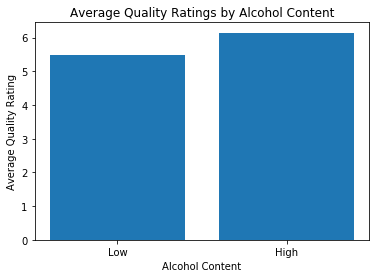

In [10]:
# Crie um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Vinhos mais suaves recebem avaliações melhores?
Crie um gráfico de barras com uma barra para amostras de vinho com baixo nível de açúcar residual e outra para amostras com alto nível de açúcar residual.

In [21]:
# Use query para selecionar cada grupo e obter sua qualidade média
median_sugar = df['residual_sugar'].median()
low_sugar = df.query('residual_sugar < {}'.format(median_sugar))
high_sugar = df.query('residual_sugar >= {}'.format(median_sugar))

mean_quality_low_sugar = low['quality'].mean()
mean_quality_high_sugar = high['quality'].mean()



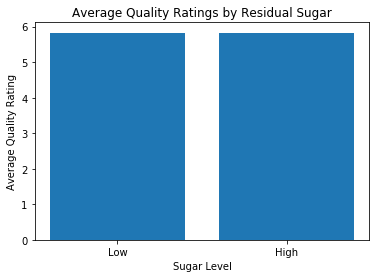

In [22]:
# Crie um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_quality_low_sugar, mean_quality_high_sugar]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Sugar Level')
plt.ylabel('Average Quality Rating');


### #3: Qual o nível de acidez que recebe a maior avaliação média?
Crie um gráfico de barras com uma barra para cada um dos quatro níveis de acidez.

In [25]:
# Use groupby para obter a qualidade média para cada nível de acidez
quality_mean = df.groupby(["acidity_levels"]).mean()["quality"]

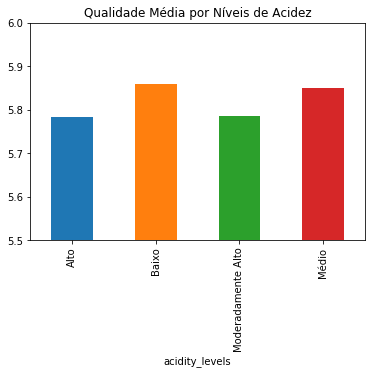

In [26]:
# Crie um gráfico de barras com rótulos adequados
quality_mean.plot(kind="bar", ylim=(5.5,6), title="Qualidade Média por Níveis de Acidez")

### Bonus: Crie um gráfico de linha para os dados em #3
Você pode usar a função [plot](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) do pyplot para isso.

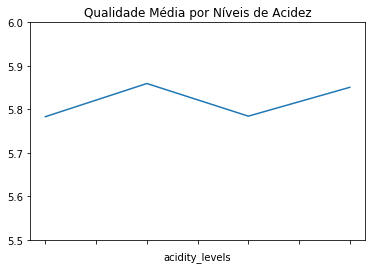

In [27]:
quality_mean.plot(kind="line", ylim=(5.5,6), title="Qualidade Média por Níveis de Acidez")

Compare isto com o gráfico de barras. Como é que a exibição desta visualização, ao invés do gráfico de barras, poderia afetar as conclusões de alguém sobre estes dados?